In [ ]:
"""
This notebook generates ISM GC shift for the TATA box (Fig. 7C, Supp. Fig. 4C).
"""

In [14]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import kendalltau

prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [4]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set scratch to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "mutagenesis.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -cvzf {SCRATCH}/{TAR}")

wget https://zenodo.org/records/10597358/files/mutagenesis.tar.gz -P /Users/adamhe/github/scratch
tar -cvzf /Users/adamhe/github/scratch/mutagenesis.tar.gz


In [23]:
# Load data and coerce to format for seaborn

corr = pd.read_csv(
    os.path.join(SCRATCH, "mutagenesis/tata/ensemble_tata_tss_gc_corr.csv.gz"), index_col=0
)
log_quantity = pd.read_csv(
    os.path.join(SCRATCH, "mutagenesis/tata/ensemble_tata_tss_gc_log_quantity.csv.gz"), index_col=0
)

corr_2d = pd.DataFrame(
    {
        "GC": [float(col) for col in corr.columns] * corr.shape[0],
        "PCC": corr.to_numpy().reshape(corr.shape[0] * corr.shape[1],),
    }
)
log_quantity_2d = pd.DataFrame(
    {
        "GC": [float(col) for col in log_quantity.columns] * log_quantity.shape[0],
        "LQ": log_quantity.to_numpy().reshape(log_quantity.shape[0] * log_quantity.shape[1],),
    }
)

corr_kendalltau = pd.DataFrame(
    [
        kendalltau([float(col) for col in corr.columns], corr.iloc[i, :])
        for i in range(corr.shape[0])
    ]
)
log_quantity_kendalltau = pd.DataFrame(
    [
        kendalltau([float(col) for col in log_quantity.columns], log_quantity.iloc[i, :])
        for i in range(log_quantity.shape[0])
    ]
)

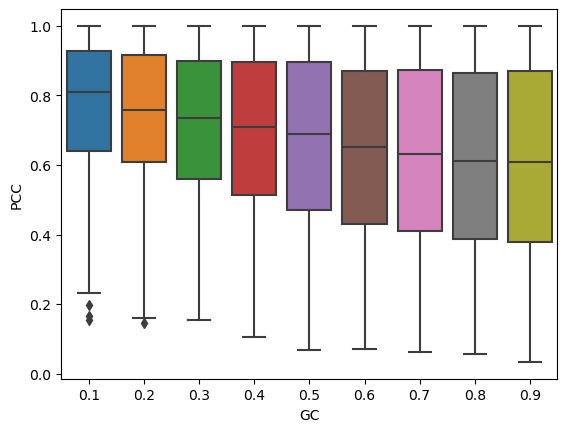

In [15]:
sns.boxplot(data=corr_2d, x="GC", y="PCC")
plt.savefig("img/tata_gc_corr_boxplot.pdf")

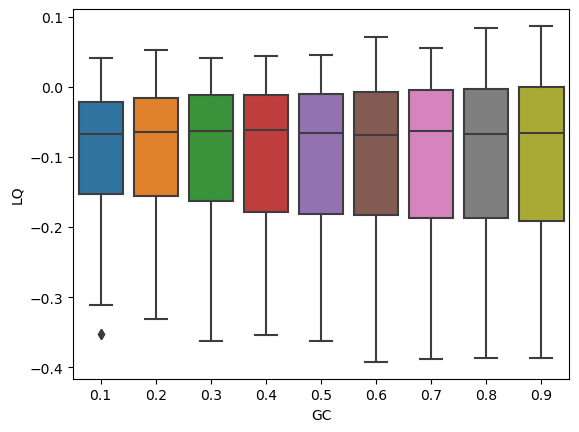

In [16]:
sns.boxplot(data=log_quantity_2d, x="GC", y="LQ")
plt.savefig("img/tata_gc_log_quantity_boxplot.pdf")

-0.7222222222222222

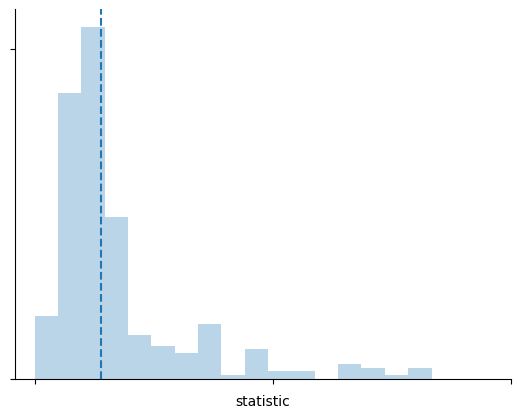

In [22]:
fig, d = plt.subplots()
sns.histplot(corr_kendalltau.statistic, bins=17, edgecolor='None', alpha=0.3)
d.set_yticks([0, 90])
d.set_yticklabels(["", ""])
d.set_xticks([-1, 0, 1])
d.set_xticklabels(["", "", ""])
d.set_ylabel("")
sns.despine()
plt.axvline(np.median(corr_kendalltau.statistic), 0, 1, color=colors[0], linestyle="--")
plt.savefig("img/tata_gc_corr_kendall.pdf")
np.median(corr_kendalltau.statistic)

0.16666666666666666

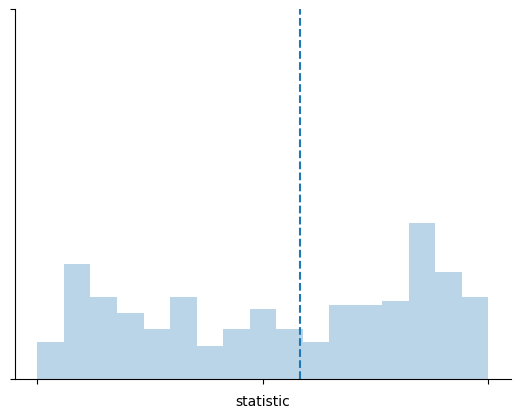

In [20]:
fig, d = plt.subplots()
sns.histplot(log_quantity_kendalltau.statistic, bins=17, edgecolor='None', alpha=0.3)
d.set_yticks([0, 90])
d.set_yticklabels(["", ""])
d.set_xticks([-1, 0, 1])
d.set_xticklabels(["", "", ""])
d.set_ylabel("")
sns.despine()
plt.axvline(np.median(log_quantity_kendalltau.statistic), 0, 1, color=colors[0], linestyle="--")
plt.savefig("img/tata_gc_log_quantity_kendall.pdf")
np.median(log_quantity_kendalltau.statistic)